# ITS307 Data Analytics : Spring Semester 2022
# Assignment 4

# Unsupervised Learning: Clustering

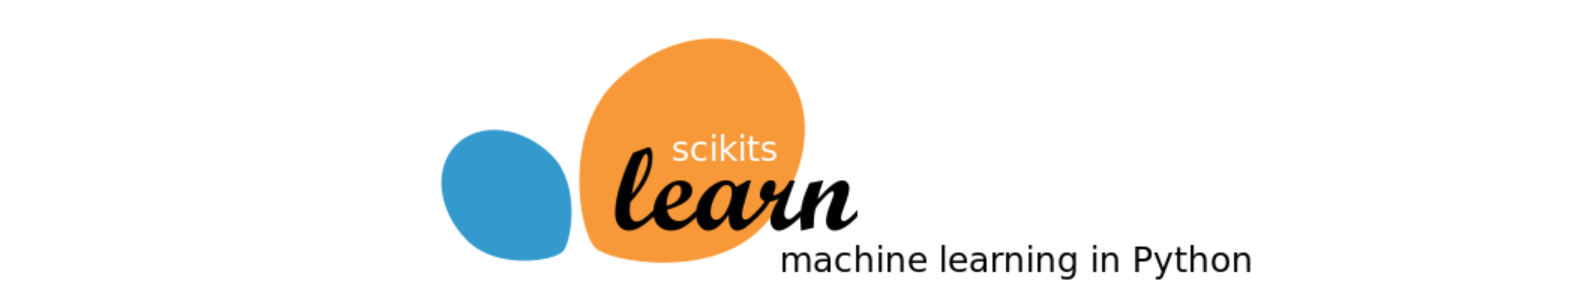

# Table of Contents 
<ol start="0">
<li> Part A </li>
<li> Part B </li>
<li> Part C</li>
</ol>

## Note: Handle null values and special characters if any.

# Part A

Instructions:
1. Read data from data1.csv file and give random column names such as A, B, C and so on.


2. Use both Elbow method and silhouette_score to find best value of K for KMean clustering. Justify your answer.


3. Create Kmean model with value of K chosen from second step. Evaluate your model and justify the goodness of your model.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
column=['A','B','C','D','E','F','G','H', 'I','J','K','L','N']
data1 =pd.read_csv("C:\\Users\\Sonam choki\\OneDrive\Desktop\\Assignment412190079\\Set A\\Set A\\data1.csv",names=column)
data1.head()

A     B     C     D    E     F     G     H     I     J     K     L  \
0  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

      N  
0  1065  
1  1050  
2  1185  
3  1480  
4   735

In [154]:
data1.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
N    0
dtype: int64

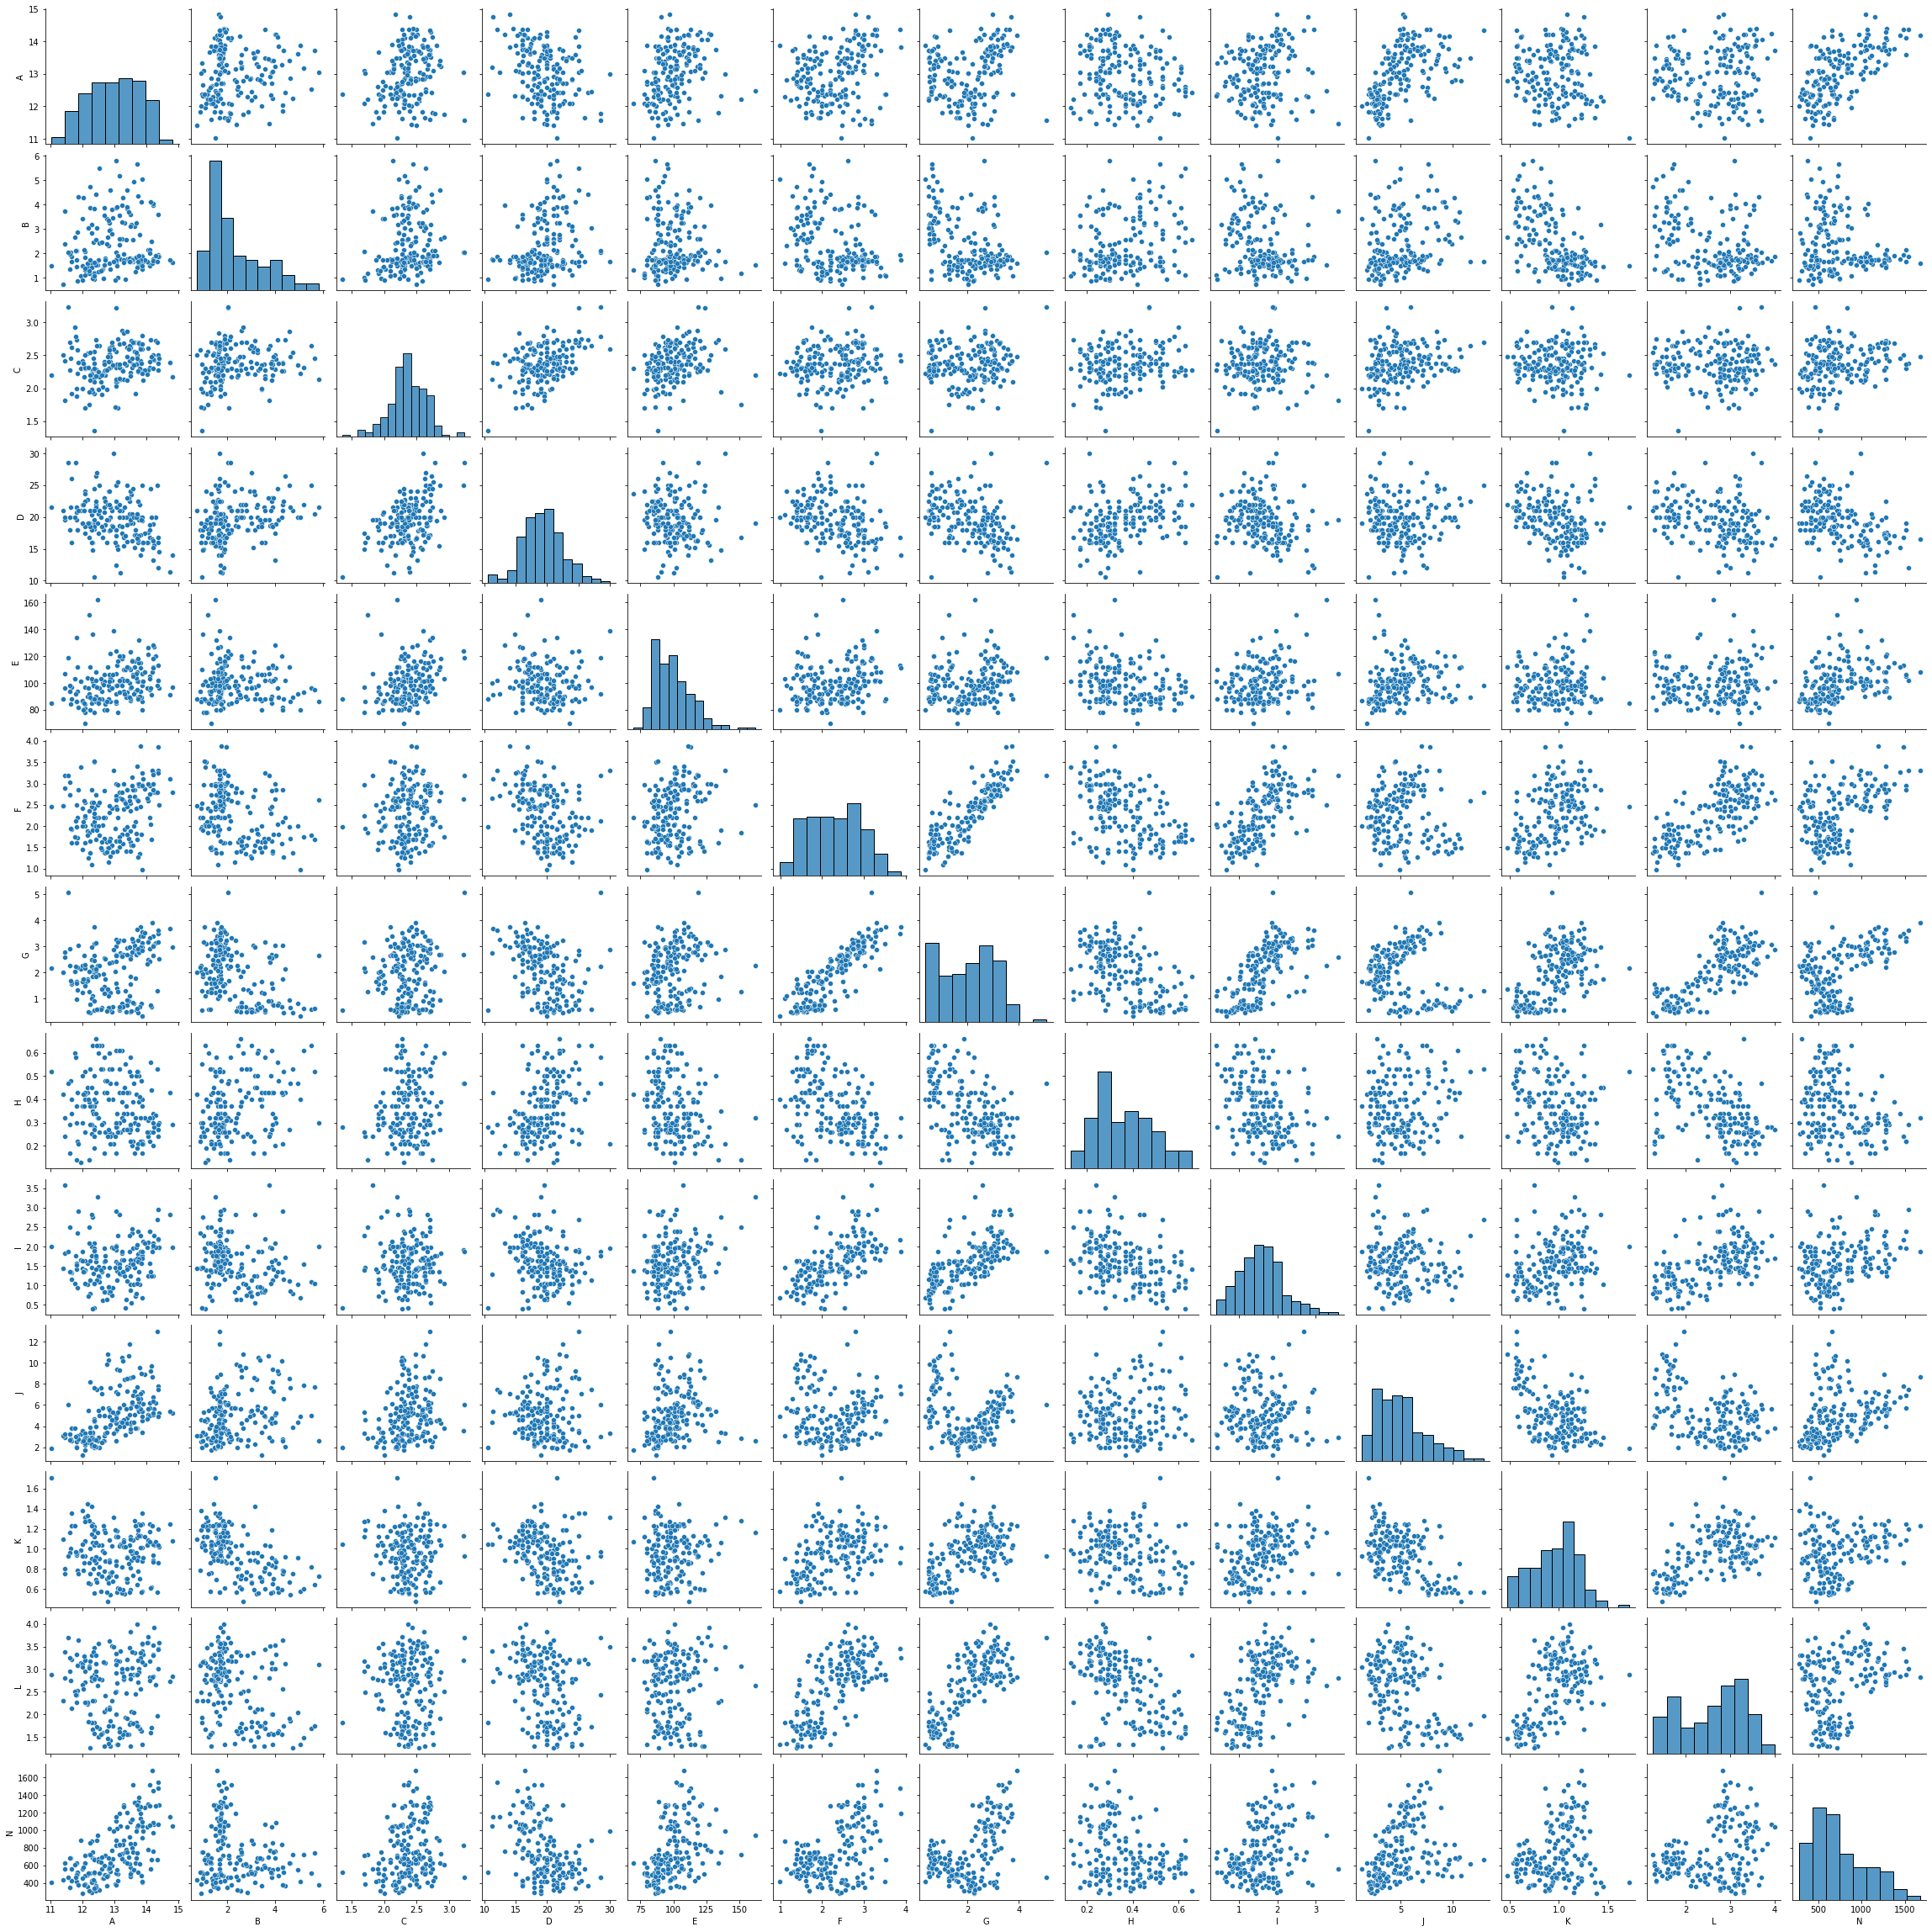

In [160]:
sns.pairplot(data1)
plt.show()

In [28]:
data1.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'N'], dtype='object')

In [29]:
data1 = data1[['A','B']]
data1.head()

A     B
0  14.23  1.71
1  13.20  1.78
2  13.16  2.36
3  14.37  1.95
4  13.24  2.59

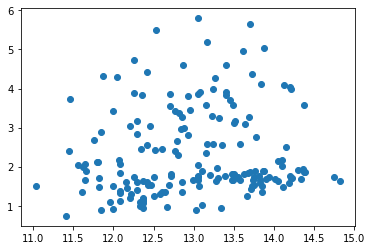

In [32]:
plt.scatter(data1['A'],data1['B'])

In [33]:
from sklearn.cluster import KMeans

In [34]:
kmean=KMeans(n_clusters=4)
kmean.fit(data1)

KMeans(n_clusters=4)

In [35]:
kmean.labels_

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3,
       0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 1,
       1, 1, 2, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 0, 1,
       2, 3, 3, 1, 0, 0, 1, 1, 1, 1, 0, 3, 3, 1, 0, 3, 1, 1, 0, 3, 3, 3,
       1, 3])

In [36]:
kmean.cluster_centers_

array([[13.74704918,  1.75213115],
       [12.74694444,  3.01277778],
       [12.17566038,  1.4809434 ],
       [13.26214286,  4.35857143]])

In [38]:
kmean.inertia_

72.68914691708522

In [40]:
data1['cluster']=kmean.labels_
data1.head()

A     B  cluster
0  14.23  1.71        0
1  13.20  1.78        0
2  13.16  2.36        1
3  14.37  1.95        0
4  13.24  2.59        1

In [42]:
cluster0 = data1[data1.cluster==0]
cluster0.head()

A     B  cluster
0  14.23  1.71        0
1  13.20  1.78        0
3  14.37  1.95        0
5  14.20  1.76        0
6  14.39  1.87        0

In [43]:
cluster1 = data1[data1.cluster==1]
cluster1.head()

A     B  cluster
2   13.16  2.36        1
4   13.24  2.59        1
19  13.64  3.10        1
77  11.84  2.89        1
93  12.29  2.83        1

In [44]:
cluster2 = data1[data1.cluster==2]
cluster2.head()

A     B  cluster
23  12.85  1.60        2
59  12.37  0.94        2
60  12.33  1.10        2
61  12.64  1.36        2
63  12.37  1.13        2

In [45]:
centroids=pd.DataFrame(data = kmean.cluster_centers_,columns=['A','B'])
centroids

A         B
0  13.747049  1.752131
1  12.746944  3.012778
2  12.175660  1.480943
3  13.262143  4.358571

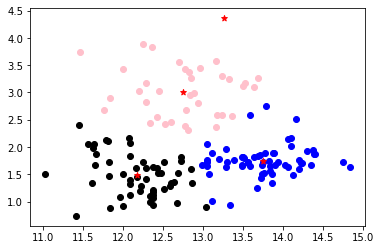

In [49]:
plt.scatter(cluster0['A'],cluster0['B'],color='blue')
plt.scatter(cluster1['A'],cluster1['B'],color='pink')
plt.scatter(cluster2['A'],cluster2['B'],color='black')
plt.scatter(centroids.A, centroids.B,color = 'red',marker ='*')

In [51]:
K = np.arange(2,11)
SSD = []
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(data1.drop('cluster',axis=1))
    SSD.append(km.inertia_)

In [52]:
SSD

[168.08374191698118,
 95.55394205616612,
 72.68914691708522,
 60.69126157885044,
 51.92867737985109,
 44.7390818875971,
 36.44275828823954,
 32.30414071160299,
 28.227077404401175]

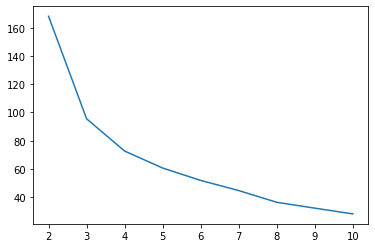

In [53]:
plt.plot(K,SSD)

In [59]:
from sklearn.metrics import silhouette_score


In [62]:
sil_coeff = silhouette_score(data1,kmean.labels_ , metric='euclidean')
sil_coeff

0.6193889452579792

In [63]:
data1.head()

A     B  cluster
0  14.23  1.71        0
1  13.20  1.78        0
2  13.16  2.36        1
3  14.37  1.95        0
4  13.24  2.59        1

In [64]:
data1.drop(['cluster'], axis=1, inplace = True)
data1.head()

A     B
0  14.23  1.71
1  13.20  1.78
2  13.16  2.36
3  14.37  1.95
4  13.24  2.59

In [65]:
K = np.arange(2,10)
sil_score = []
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(data1)
    sil_score.append(silhouette_score(data1,km.labels_))

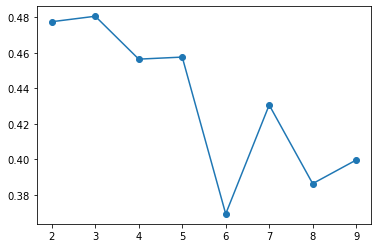

In [66]:
plt.plot(K,sil_score,'-o')

In [67]:
sil_score

[0.47745578237294,
 0.480535724062608,
 0.45639433450218325,
 0.45754971376149134,
 0.36928687482915257,
 0.43059519713444183,
 0.38633005439769746,
 0.399619847384246]

# Part B

### INSTRUCTIONS
1. Read data from data2.csv and give any random column names such as x,y.


2. Use appropriate techniques to find best choices of algorithm to apply to given dataset. Justify your choice.


3. Create clustering model from your choices of algorithm in step 2. Tune required hyperparameters to get expected clusters.


4. Use seaborn to plot your clusters using different markers and colors for each clusters formed.


5. Evaluate your model and justify the goodness of the cluster formed.

In [17]:
import pandas as pd
import numpy as np

In [19]:
column=['x','y']
data2= pd.read_csv("C:\\Users\\Sonam choki\\OneDrive\\Desktop\\Assignment412190079\\Set A\\Set A\\data2.csv",names=column)
data2.head()

x         y
0  1.481265 -1.058590
1  0.360573 -1.157805
2 -1.684897 -1.133287
3  1.946917 -1.187486
4  0.220311  0.844432

In [68]:
data2.isnull().sum()

x    0
y    0
dtype: int64

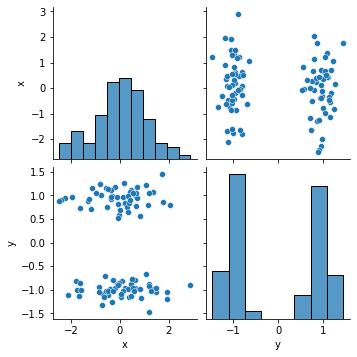

In [70]:
sns.pairplot(data2)
plt.show()

In [71]:
data2.columns

Index(['x', 'y'], dtype='object')

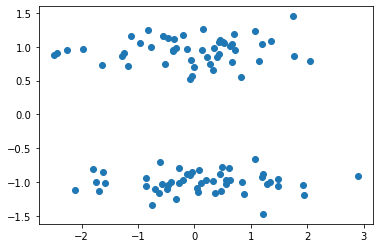

In [72]:
plt.scatter(data2['x'],data2['y'])

In [73]:
from sklearn.cluster import DBSCAN

In [84]:
dbscan = DBSCAN(eps=1,min_samples=10)
dbscan.fit(data2)

DBSCAN(eps=1, min_samples=10)

In [85]:
dbscan.labels_

array([ 0,  0, -1, -1,  1,  0,  1,  1, -1,  0,  1,  1,  0,  1,  1,  1,  1,
        1,  0, -1, -1,  0,  1,  1,  0, -1,  0,  0,  1,  0,  0,  1,  1,  0,
        0,  1,  0,  1,  0,  0,  0, -1,  1, -1,  1,  0,  1,  1,  1,  0,  1,
       -1, -1,  0,  1,  1, -1,  1,  0,  0, -1,  1,  1, -1,  0,  1, -1,  1,
        0,  1,  0,  0,  0,  0,  1,  0,  0, -1, -1,  1,  0,  0,  0, -1,  1,
        0,  1,  0,  0, -1,  1,  1,  0, -1,  1,  0,  0,  1,  0,  1],
      dtype=int64)

In [86]:
data2['dbscan']=dbscan.labels_
data2.head()

x         y  dbscan
0  1.481265 -1.058590       0
1  0.360573 -1.157805       0
2 -1.684897 -1.133287      -1
3  1.946917 -1.187486      -1
4  0.220311  0.844432       1

In [87]:
dbscan0=data2[data2.dbscan==0]
dbscan0.head()

x         y  dbscan
0   1.481265 -1.058590       0
1   0.360573 -1.157805       0
5   1.344560 -0.991684       0
9  -0.127784 -0.886818       0
12 -0.200310 -0.969621       0

In [88]:
dbscan1=data2[data2.dbscan==1]
dbscan1.head()

x         y  dbscan
4   0.220311  0.844432       1
6  -1.125771  1.161369       1
7  -0.524397  0.744974       1
10  0.498376  1.075230       1
11  0.445149  1.103469       1

In [89]:
dbscan2=data2[data2.dbscan==2]
dbscan2.head()

Empty DataFrame
Columns: [x, y, dbscan]
Index: []

In [90]:
db = data2[data2.dbscan== -1]
db.head()

x         y  dbscan
2  -1.684897 -1.133287      -1
3   1.946917 -1.187486      -1
8   1.743963  1.451582      -1
19  1.354589  1.079199      -1
20 -1.789891 -0.805547      -1

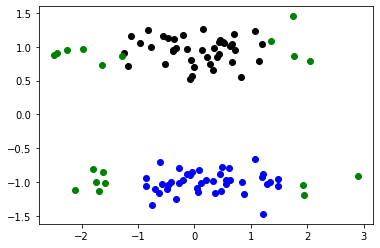

In [91]:
plt.scatter(dbscan0['x'],dbscan0['y'],color='blue')
plt.scatter(dbscan1['x'],dbscan1['y'],color='black')
plt.scatter(db['x'],db['y'],color='green')

In [92]:
from sklearn.metrics import silhouette_score

In [94]:
silhouette_coeff=silhouette_score(data2,dbscan.labels_, metric='euclidean')
silhouette_coeff

0.5201844742175917

In [96]:
data2.head()

x         y  dbscan
0  1.481265 -1.058590       0
1  0.360573 -1.157805       0
2 -1.684897 -1.133287      -1
3  1.946917 -1.187486      -1
4  0.220311  0.844432       1

In [97]:
data2.drop(['dbscan'], axis=1, inplace = True)
data2.head()

x         y
0  1.481265 -1.058590
1  0.360573 -1.157805
2 -1.684897 -1.133287
3  1.946917 -1.187486
4  0.220311  0.844432

In [104]:
K = np.arange(2,10)
sil_score = []
for k in K:
    km =KMeans(n_clusters = k)
    km.fit(data2)
    sil_score.append(silhouette_score(data2,km.labels_))

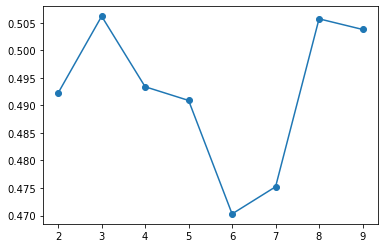

In [101]:
plt.plot(K,sil_score,'-o')

In [102]:
sil_score

[0.4922473726597875,
 0.5061690268975793,
 0.4933756292373485,
 0.4908899986457434,
 0.4703011220309684,
 0.47522617064907385,
 0.5056994261633196,
 0.5037739778951487]

# Part C

### INSTRUCTIONS:

1. Read data from data3.csv and name columns as x and y.


2. Assuming 4 clusters in the given datasets, compare both clustering algorithm and mention which algorithm is more suitable.


3. Use seaborn to plot your clusters for both the algorithms.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
column=['x','y']
data3= pd.read_csv("C:\\Users\\Sonam choki\\OneDrive\\Desktop\\Assignment412190079\\Set A\\Set A\\data3.csv",names=column)
data3.head()

x         y
0 -4.394278  9.986850
1 -3.446856 -0.340388
2 -2.924456 -0.115665
3 -4.533322  2.782269
4 -4.257819  8.498752

In [107]:
data3.isnull().sum()

x    0
y    0
dtype: int64

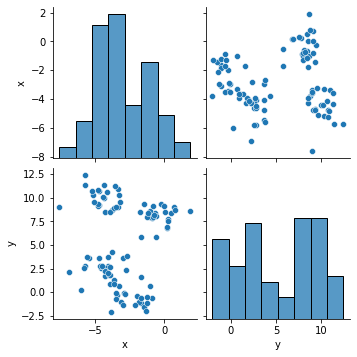

In [109]:
sns.pairplot(data3)
plt.show()

In [110]:
data3.columns

Index(['x', 'y'], dtype='object')

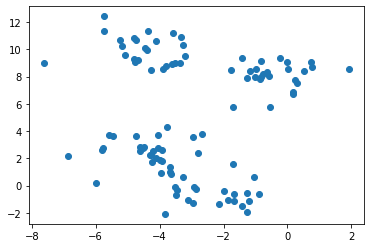

In [111]:
plt.scatter(data3['x'], data3['y'])

In [112]:
from sklearn.cluster import KMeans


In [113]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(data3)

KMeans(n_clusters=4)

In [114]:
kmeans.labels_

array([2, 3, 3, 1, 2, 3, 2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 3, 3, 2,
       3, 0, 2, 0, 2, 0, 0, 3, 2, 1, 3, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 2,
       3, 1, 2, 0, 3, 2, 0, 1, 2, 3, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 3, 3,
       0, 1, 2, 1, 1, 1, 2, 2, 3, 2, 1, 1, 1, 3, 3, 3, 1, 2, 1, 0, 3, 1,
       3, 2, 1, 3, 1, 0, 0, 1, 0, 2, 3, 0])

In [116]:
kmeans.cluster_centers_

array([[-0.39233905,  8.09893604],
       [-4.36659854,  2.45837114],
       [-4.46343585,  9.96867608],
       [-2.26100823, -0.63792927]])

In [119]:
kmeans.inertia_

179.29171128594288

In [122]:
x_sample = [[1.3,6.3],[2.3,0.3]]
kmeans.predict(x_sample)

array([0, 3])

In [124]:
#DBSCAN Clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,min_samples=10)
dbscan.fit(data3)

DBSCAN(eps=1, min_samples=10)

In [125]:
dbscan.labels_

array([ 0, -1, -1,  1, -1, -1, -1,  2,  1,  2, -1,  0,  0,  2,  2,  1,  1,
       -1,  1, -1,  3,  0,  3,  2,  0,  2, -1,  2,  2, -1, -1,  1, -1,  1,
        2, -1,  2,  2,  1, -1, -1,  0,  2, -1,  3,  1, -1,  2, -1,  0,  2,
        1, -1,  3, -1,  2,  1, -1,  2,  2,  1,  1, -1,  0, -1,  3, -1, -1,
        0, -1,  1,  1,  0, -1,  3,  0,  1,  1, -1,  3,  3,  3,  1, -1, -1,
        2, -1, -1,  3, -1,  1, -1, -1, -1,  2, -1, -1, -1, -1,  2],
      dtype=int64)

In [126]:
#Visual Representation of clusters
data3['km']=kmeans.labels_
data3.head()

x         y  km
0 -4.394278  9.986850   2
1 -3.446856 -0.340388   3
2 -2.924456 -0.115665   3
3 -4.533322  2.782269   1
4 -4.257819  8.498752   2

In [127]:
data3['dbscan']=dbscan.labels_
data3.head()

x         y  km  dbscan
0 -4.394278  9.986850   2       0
1 -3.446856 -0.340388   3      -1
2 -2.924456 -0.115665   3      -1
3 -4.533322  2.782269   1       1
4 -4.257819  8.498752   2      -1

In [128]:
kmeans0=data3[data3.km==0]
kmeans0.head()

x         y  km  dbscan
7  -0.874748  7.847986   0       2
9  -0.632853  8.364432   0       2
10  0.172921  6.742141   0      -1
13 -1.019265  8.007922   0       2
14 -1.772029  8.493603   0       2

In [129]:
kmeans1=data3[data3.km==1]
kmeans1.head()

x         y  km  dbscan
3  -4.533322  2.782269   1       1
8  -4.041835  2.748770   1       1
15 -3.682538  0.968225   1       1
16 -4.046161  3.694628   1       1
18 -4.254036  1.713184   1       1

In [130]:
kmeans2=data3[data3.km==2]
kmeans2.head()

x          y  km  dbscan
0  -4.394278   9.986850   2       0
4  -4.257819   8.498752   2      -1
6  -3.273590  10.314390   2      -1
11 -5.186093  10.242716   2       0
12 -4.443636  10.121907   2       0

In [132]:
kmeans3=data3[data3.km==3]
kmeans3.head()

x         y  km  dbscan
1  -3.446856 -0.340388   3      -1
2  -2.924456 -0.115665   3      -1
5  -3.492740 -0.672294   3      -1
19 -3.512515 -0.083221   3      -1
20 -1.660840 -1.117308   3       3

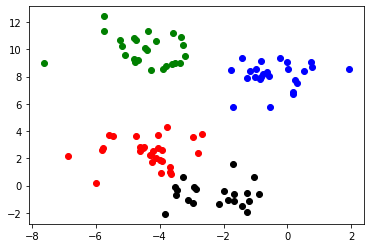

In [134]:
plt.scatter(kmeans0['x'],kmeans0['y'],color='blue')
plt.scatter(kmeans1['x'],kmeans1['y'],color='red')
plt.scatter(kmeans2['x'],kmeans2['y'],color='green')
plt.scatter(kmeans3['x'],kmeans3['y'],color='black')

In [136]:
db0 = data3[data3.dbscan == 0]
db0.head()

x          y  km  dbscan
0  -4.394278   9.986850   2       0
11 -5.186093  10.242716   2       0
12 -4.443636  10.121907   2       0
21 -4.687161   9.254266   2       0
24 -4.736415  10.722325   2       0

In [137]:
db1 = data3[data3.dbscan == 1]
db1.head()

x         y  km  dbscan
3  -4.533322  2.782269   1       1
8  -4.041835  2.748770   1       1
15 -3.682538  0.968225   1       1
16 -4.046161  3.694628   1       1
18 -4.254036  1.713184   1       1

In [138]:
db2 = data3[data3.dbscan == 2]
db2.head()

x         y  km  dbscan
7  -0.874748  7.847986   0       2
9  -0.632853  8.364432   0       2
13 -1.019265  8.007922   0       2
14 -1.772029  8.493603   0       2
23 -0.999680  8.594857   0       2

In [139]:
db3 = data3[data3.dbscan == 3]
db3.head()

x         y  km  dbscan
20 -1.660840 -1.117308   3       3
22 -0.881670 -0.652058   3       3
44 -1.423922 -1.513315   3       3
53 -1.852016 -1.044502   3       3
65 -1.280635 -1.973173   3       3

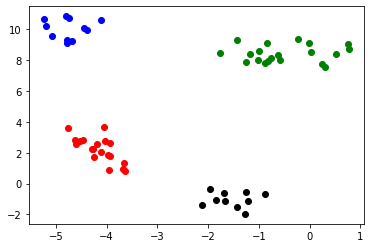

In [140]:
plt.scatter(db0['x'],db0['y'],color='blue')
plt.scatter(db1['x'],db1['y'],color='red')
plt.scatter(db2['x'],db2['y'],color='green')
plt.scatter(db3['x'],db3['y'],color='black')

In [ ]:
#DBSACN Algorithm is suitable given dataset

In [142]:
from sklearn.metrics import silhouette_score

In [143]:
sil_coeff = silhouette_score(data3,kmeans.labels_ , metric='euclidean')
sil_coeff

0.5690720565237415

In [144]:
data3.head()

x         y  km  dbscan
0 -4.394278  9.986850   2       0
1 -3.446856 -0.340388   3      -1
2 -2.924456 -0.115665   3      -1
3 -4.533322  2.782269   1       1
4 -4.257819  8.498752   2      -1

In [148]:
data3= data3.drop(['km','dbscan'],axis=1)

KeyError: "['km' 'dbscan'] not found in axis"

In [150]:
K = np.arange(2,10)
sil_score = []
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(data3)
    sil_score.append(silhouette_score(data3,km.labels_))

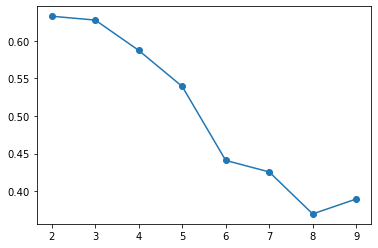

In [151]:
plt.plot(K,sil_score,'-o')

In [152]:
sil_score

[0.6324652244134262,
 0.6273724846320714,
 0.5870629054102997,
 0.5391137361120137,
 0.440797786738421,
 0.42552765943204357,
 0.3696982538253901,
 0.38949200830465414]